In [1]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype']='none'
from tools.bootstrapTest import bootstrap_traces
from tools.results import data_of_interest
# from tools.results import rnai_response

## Plotting of regeneration Data

**Notes**
_interest_: datasets to look at. note that datasets aren't merged in this function

_whole_ref_: if True, compares to whole worm WT, else compares to regenerating WT

_ylim_: ylim for plotting. define eithe just one tuple to apply to all datasets, or a tuple of tuples with limits for each dataset plotted

(0, 1)
WT_10s
(0, 1.5)
WT_10s


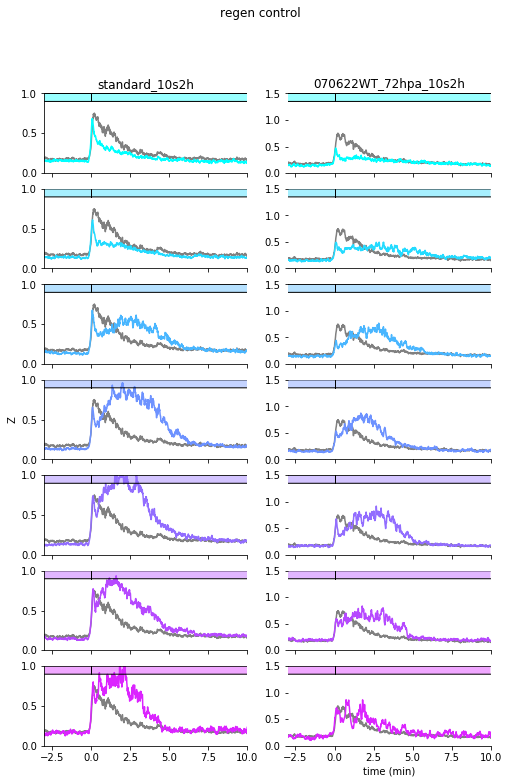

In [3]:
import numpy as np
from tools.results_regeneration import rnai_response_regen
n_boot = 1e0
statistic=np.median
#plot_subset
interest = ['10s2h']
exclude = []
fig,ax = rnai_response_regen(interest,exclude,n_boot,statistic,whole_ref=True,
                            ylim=((0,1),(0,1.5),(0,1),(0,1.5)),conf_interval=99)
for a in np.ravel(ax):
    a.set_xlim(-3,10)
#     a.set_ylim(0,1.5)

In [4]:
fig.savefig('plots/10s_regeneration.svg')

In [6]:
qq = 'a+bc'
qq.count('+')

1

## Merging regeneration data with different start points

_leaving this a more manually defined thing for now. I left the combinations you should need commented in the cell_ -SB

**Notes**

_data_: the regenerating datasets you want to combine

_day_: the start day for each dataset

_ref_: the whole worm to reference against

standard_30s2h WT_30s
data/LDS_response_uvRange.pickle
dict_keys(['tau', 'WT_60s', 'WT_20s', 'WT_10s', 'WT', 'WT_1s', 'WT_1e-1s', 'WT_30s', 'WT_1e-2s', 'WT_5m'])


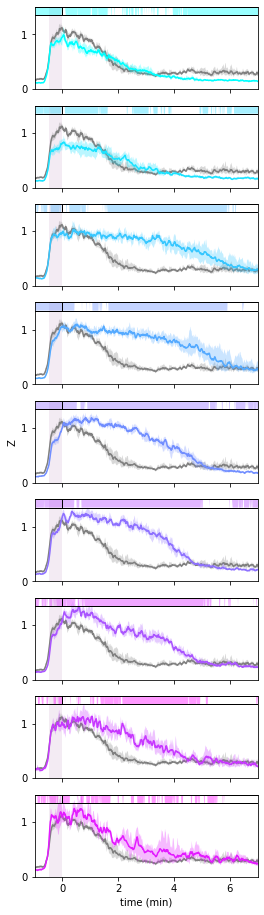

In [5]:
from tools.results_regeneration import merge_regenerations

n_boot=1e1

data = ['standard_30s2h','1002_78hpa_30s2h']
day = [0,3,]
ref = 'WT_30s'

# data = ['standard_5s2h','110521WT_72hpa_5s2h']
# day=[0,3]
# ref = 'WT'

# data = ['standard_1s2h','012821WT_72hpa_1s2h']
# day=[0,3]
# ref = 'WT_1s'
# data =['011422WT35mmBiopsyPostEyespot_60mpa_30s2h','103021WT35mmBiopsyPostEyespot_90mpa_30s2h']
# day=[0,0]

# data =['standard_10s2h','070622WT_72hpa_10s2h']
# ref = 'WT_10s'
# day=[0,3]
fig,ax = merge_regenerations(data,ref=ref,day=day,n_boot=n_boot,ylim=(0,1.5))

## One day of regeneration for multiple experiments

_leaving this a more manually defined thing for now. I left the combinations you should need commented in the cell_ -SB

**Notes**

_data_: the regenerating datasets you want to look at
        
**note: to merge datasets for a condition, list them together as a tuple. see the 30s WT regen below for example

_dpa_: the day you want to plot

_ref_: the whole worm to reference against

_day_shift_: the day post amputation each dataset begins at. Default of None will assume each begins from 0dpa

  0%|          | 0/10 [00:00<?, ?it/s]

0


  0%|          | 0/10 [00:00<?, ?it/s]

1


  0%|          | 0/10 [00:00<?, ?it/s]

2


100%|██████████| 10/10 [00:00<00:00, 191.32it/s]


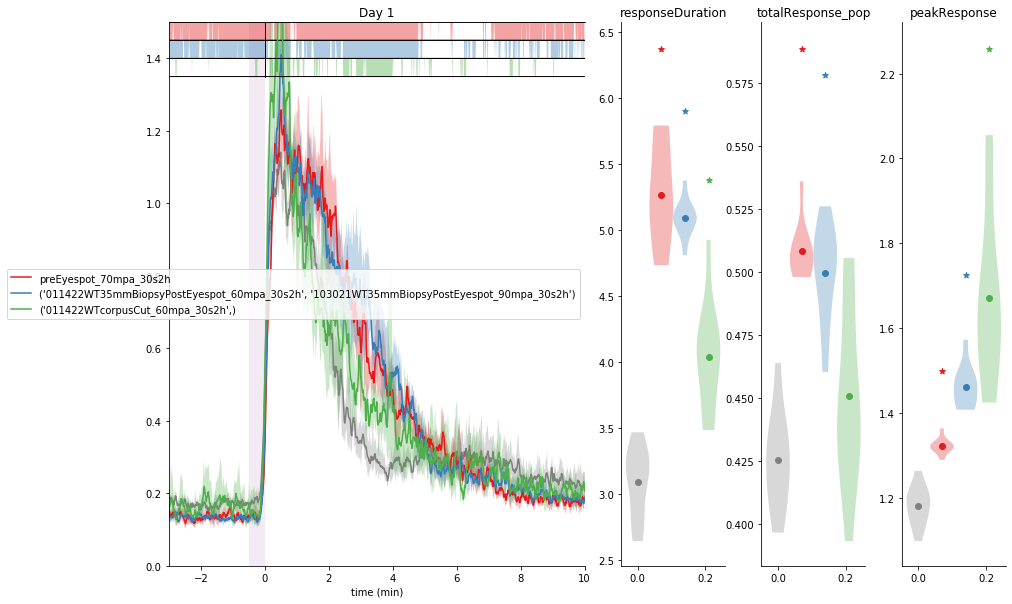

In [1]:
from tools.results_regeneration import regen_single_day
data = ['pc2_30s2h',('standard_30s2h','1002_78hpa_30s2h')]
day_shift = [0,(0,3)]
# data = ['pc2_5s2h',('standard_5s2h','110521WT_72hpa_5s2h')]
dpa=4
data=['preEyespot_70mpa_30s2h',
      ('011422WT35mmBiopsyPostEyespot_60mpa_30s2h','103021WT35mmBiopsyPostEyespot_90mpa_30s2h'),
      ('011422WTcorpusCut_60mpa_30s2h',)]
day_shift=[0,(0,0),(0,0)]
dpa=1

fig, ax = regen_single_day(data,dpa=dpa,n_boot=1e1,conf_interval=99,ylim=(0,1.5),day_shift=day_shift)

In [9]:
fig.savefig('plots/injuries_1dpa.svg')



In [7]:
import pickle
with open ('data/LDS_response_regen.pickle','rb') as f:
    result = pickle.load(f)

interest = 'corpus'    
for i in result.keys():
    if interest in i: print(i)

111421WTcorpusCut_60mpa_5s2h
011422WTcorpusCut_60mpa_5s2h
011422WTcorpusCut_60mpa_30s2h
110121WTcorpusCut_105mpa_30s2h


## Time of excess activity start and end

WT_8hpa_1s2h
71
WT_8hpa_5s2h
44
WT_8hpa_10s2h
20
WT_8hpa_30s2h
15


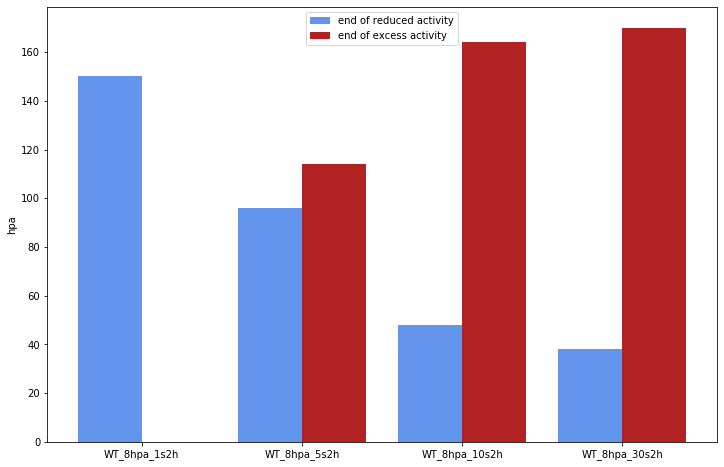

In [4]:
# from tools.results_regeneration import excess_activity_regeneration
# excess_activity_regeneration(n_boot=1e1,pool=1)

from tools.results_regeneration import excess_activity_regeneration_v072722
fig,ax=excess_activity_regeneration_v072722(n_boot=1e3,pool=12)



In [5]:
fig.savefig('plots/excessActivity_regen.svg')

In [3]:
name = 'data/LDS_response_regen_indPulse.pickle'
import pickle
with open(name,'rb') as f:
    result = pickle.load(f)
for k in result.keys():
    if 'WT' in k: print(k)

WT_30mpa_30s1h
WT_heads_30mpa_30s1h
WT_8hpa_30s2h
WT_79hpa_30s2h
WT_8hpa_5s2h
WT_8hpa_1s2h
WT_8hpa_20s2h
WT_8hpa_10s2h
WT_vibe_8hpa_30s2h
100721WT_prePharynx_8hpa_30s2h
100721WT_postPharynx_8hpa_30s2h
101321WT_postPharynx_8hpa_30s2h
040122WT_postEyespot_50mpa_30s2h
040122WT_midEyespotPharynx_40mpa_30s2h
032122WT_preEyespot_70mpa_30s2h
022222WT_postEyespot_70mpa_5s2h
022222WT_preEyespot_80mpa_5s2h
030722WT_1xPostEyespot_90mpa_5s2h
030722WT_midEyespotPharynx_80mpa_5s2h


## Plot any response measurement across different days

Used to show stability of whole worm response across days in Figure S1. Can also apply it to regeneration data if you're curious

100%|██████████| 1000/1000 [00:02<00:00, 361.34it/s]


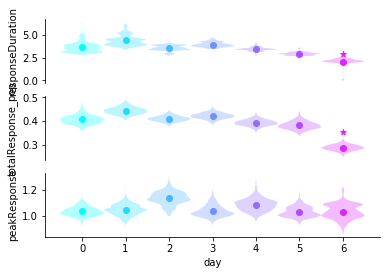

In [10]:
from tools.results_regeneration import rnai_regen_dailyStats

interest=['wholeWorm_30s2h']
fig,ax = rnai_regen_dailyStats(interest,exclude=[],n_boot=1e3,whole_ref=False)

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype']='none'
# fig.savefig('plots/wholeWorm_consistency_30s_measurements_figS1.svg')